In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import ols
import statsmodels.api as sm

url_data = "https://raw.githubusercontent.com/jealcalat/AEM-ITESO/main/datasets/wages.csv"

data = pd.read_csv(url_data)
data.head()

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43


/home/mrrobot/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


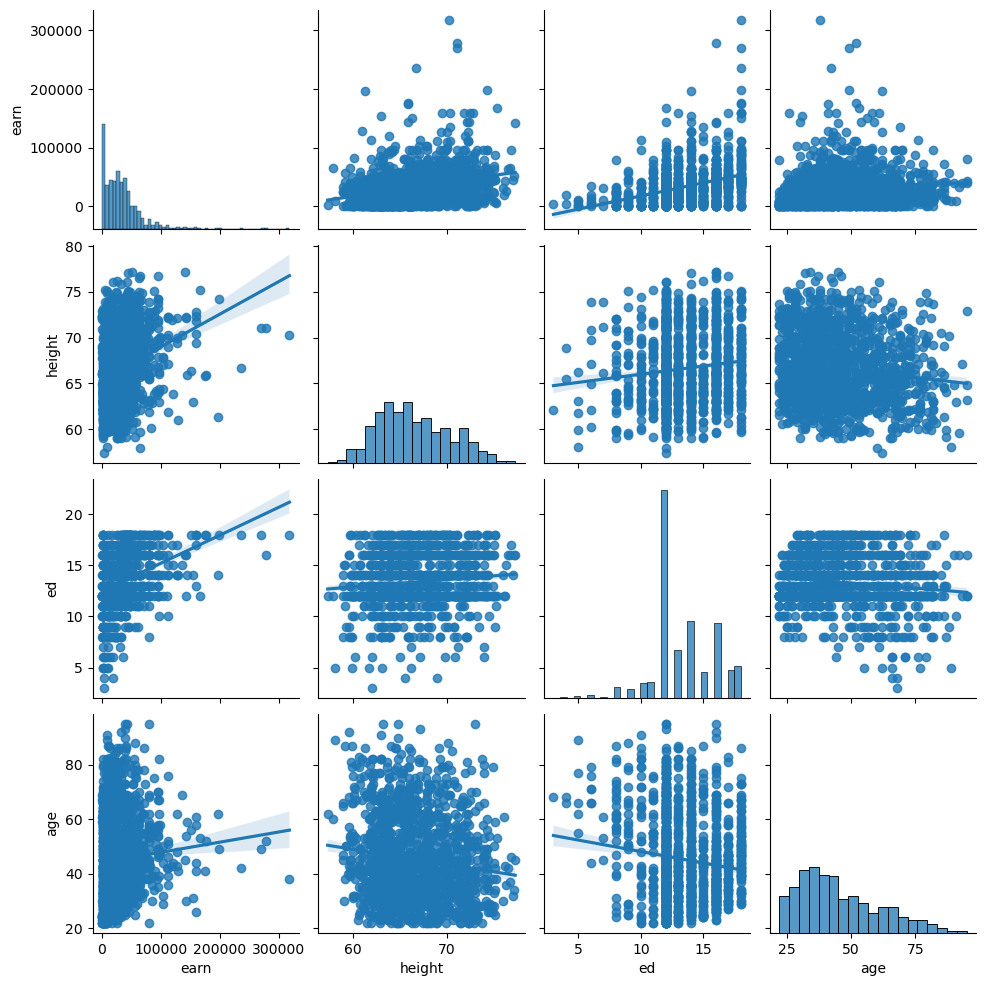

In [7]:
# pairs plot
sns.pairplot(data, kind="reg")

/home/mrrobot/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mrrobot/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


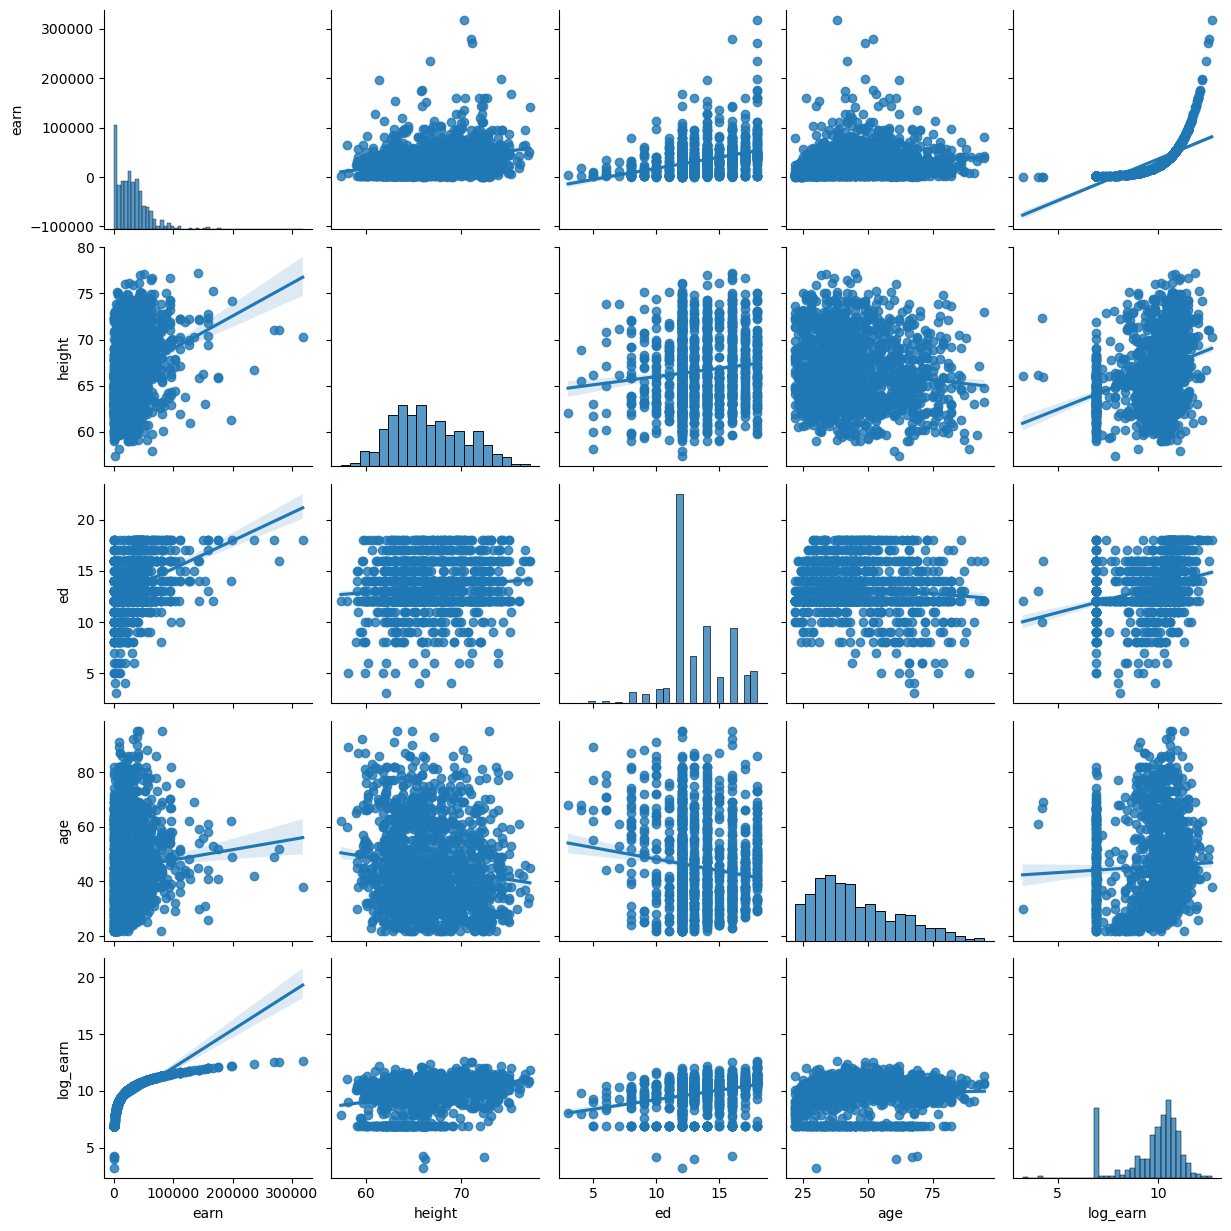

In [10]:
# log transform earn
data["log_earn"] = np.log(data["earn"])
sns.pairplot(data, kind="reg")

Esto da lugar a un modelo log-lineal, que tiene la siguiente forma:

$$\ln y = \beta_0 + \beta_1 x_1 + \dots + \beta_p x_p \epsilon$$

donde $\epsilon$ es un error aleatorio. La estimación de los parámetros $\beta_0, \beta_1, \dots, \beta_p$ se realiza mediante el método de mínimos cuadrados, al igual que el modelo lineal que ya conocemos. 

Ahora, el modelo log-lineal se puede transformar en un modelo lineal, aplicando la función exponencial a ambos lados de la ecuación:

$$y = e^{\beta_0 + \beta_1 x_1 + \dots + \beta_p x_p \epsilon}$$

Lo que es igual a 

$$y = e^{\beta_0} e^{\beta_1 x_1} \dots e^{\beta_p x_p} \epsilon$$

Recordando que en regresión lineal, los coeficientes se interpretan de la siguiente manera:

- $\beta_0$ es el valor esperado de $y$ cuando $x=0$.
- $\beta_1$ es el cambio esperado en $y$ por cada cambio unitario en $x$. Es decir, si $x$ aumenta en 1, $y$ aumenta en $\beta_1$.

Sin embargo, si log-transformamos $y$, entonces los coeficientes se interpretan de manera diferente.


Si quieres averiguar cómo cambia $ y $ con respecto a $ x $, puedes exponenciar ambos lados:

1. Empezando desde $ \ln(y) = \beta_0 + \beta_1 \cdot x $,
2. Exponenciando ambos lados se obtiene $ y = e^{\beta_0 + \beta_1 \cdot x} $,
3. Esto se simplifica a $ y = e^{\beta_0} \times e^{\beta_1 \cdot x} $.

Ahora, si $ x $ aumenta en 1 (es decir, $ \Delta x = 1 $), entonces:

- $ y_{\text{nuevo}} = e^{\beta_0} \times e^{\beta_1 \cdot (x + 1)} $,
- $ y_{\text{nuevo}} = e^{\beta_0} \times e^{\beta_1 \cdot x} \times e^{\beta_1} $,
- $ y_{\text{nuevo}} = y_{\text{anterior}} \times e^{\beta_1} $.

Aquí, $ e^{\beta_1} $ es el factor multiplicativo por el cual $ y $ aumenta por cada aumento de una unidad en $ x $.

Por lo tanto, cuando exponencias $ \beta_1 $, obtienes $ e^{\beta_1} $, que te indica el cambio multiplicativo en $ y $ para un cambio de una unidad en $ x $.

In [12]:
# run model with earn, then with log_earn using ed as predictor
# model 1
model1 = sm.OLS.from_formula("earn ~ ed", data=data)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   earn   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     192.7
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           4.19e-41
Time:                        18:45:15   Log-Likelihood:                -16139.
No. Observations:                1379   AIC:                         3.228e+04
Df Residuals:                    1377   BIC:                         3.229e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.753e+04   4391.609     -6.268      0.0

In [13]:

# model 2
model2 = sm.OLS.from_formula("log_earn ~ ed", data=data)
result2 = model2.fit()
print(result2.summary())


                            OLS Regression Results                            
Dep. Variable:               log_earn   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.77e-28
Time:                        18:45:17   Log-Likelihood:                -2333.4
No. Observations:                1368   AIC:                             4671.
Df Residuals:                    1366   BIC:                             4681.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5498      0.201     37.596      0.0

In [14]:
# extraer AIC de cada modelo
print(result1.aic)
print(result2.aic)

32281.117934149417
4670.862600156634


In [15]:
# correr modelo agregando age
model3 = sm.OLS.from_formula("log_earn ~ ed + age", data=data)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:               log_earn   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     69.76
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.43e-29
Time:                        18:46:11   Log-Likelihood:                -2328.2
No. Observations:                1368   AIC:                             4662.
Df Residuals:                    1365   BIC:                             4678.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1232      0.240     29.690      0.0

In [16]:
# correr modelo agregando interacción de age y ed
model4 = sm.OLS.from_formula("log_earn ~ ed + age + ed*age", data=data)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:               log_earn   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     46.66
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.05e-28
Time:                        18:47:02   Log-Likelihood:                -2328.0
No. Observations:                1368   AIC:                             4664.
Df Residuals:                    1364   BIC:                             4685.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5578      0.652     11.587      0.0

In [18]:
# correr modelo usando ed, age y sex como dummy
model5 = sm.OLS.from_formula("log_earn ~ ed + age + C(sex)", data=data)
result5 = model5.fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:               log_earn   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     121.2
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.32e-69
Time:                        18:49:30   Log-Likelihood:                -2233.1
No. Observations:                1368   AIC:                             4474.
Df Residuals:                    1364   BIC:                             4495.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.8497      0.225     30.

/home/mrrobot/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

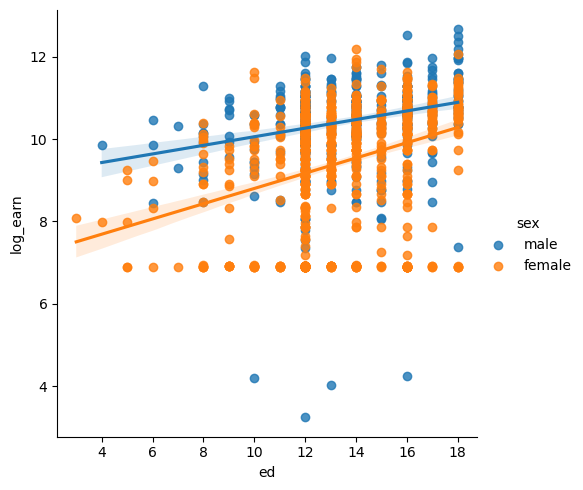

In [22]:
# scatter plot of ear as a function of ed, colored by sex; add regression line for sex == male, and sex == female
# Create a scatter plot of 'ear' as a function of 'ed', colored by 'sex'
plt.figure(figsize=(8, 6))
# Add regression lines for 'sex' == 'male' and 'sex' == 'female'
sns.lmplot(x='ed', y='log_earn', hue='sex', data=data)
plt.show()

El efecto de ser hombre o mujer en el salario es el siguiente:

`C(sex)[T.male]     0.9929 `

¿Qué significa? Recordando que tenemos exponenciar $\beta$ para obtener un efecto multiplicativo:

$$e^{0.9929} = 2.70$$

Interpretando `x=0` para `female` y `x=1` para male, (es decir, $ \Delta x = 1 $), entonces:

- $ y_{\text{male}} = e^{\beta_0} \times e^{0.9929 \cdot (x + 1)} $,
- $ y_{\text{male}} = e^{\beta_0} \times e^{0.9929 \cdot x} \times e^{0.9929} $,
- $ y_{\text{male}} = y_{\text{female}} \times e^{0.9929} = 2.70\times y_{\text{female}} $.

Podemos obtener predicciones precisas y corroborar este resultado con el método `predict`:


In [24]:
# Create a DataFrame with the predictor variables for both male and female
new_data = pd.DataFrame({
    'ed': [17, 17],  # 17 years of education for both
    'age': [35, 35],  # 35 years old for both
    'sex': ['male', 'female']  # Male and Female
})

# Use the `predict` method to get the log earnings
predicted_log_earn = result5.predict(new_data)

# Convert log earnings to original earnings scale
predicted_earn = np.exp(predicted_log_earn)

# Output the predicted log earnings and original scale earnings
for i, sex in enumerate(new_data['sex']):
    print(f"Predicted log earnings for {sex}: {predicted_log_earn.iloc[i]}")
    print(f"Predicted earnings for {sex}: {predicted_earn.iloc[i]}")


Predicted log earnings for male: 10.903423825749789
Predicted earnings for male: 54362.17213226494
Predicted log earnings for female: 9.910508421949135
Predicted earnings for female: 20140.9114699508


In [28]:
predicted_earn.iloc[0]/predicted_earn.iloc[1]

2.699091955861605